In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score, make_scorer,recall_score
from sklearn.decomposition import PCA

In [22]:
df = pd.read_csv('jm_train.csv')

In [23]:
# Primeros cinco registros del dataset.
df.head()

,feature1,feature2,feature3,feature4,feature5,feature6,target
0,0.474335,0.881640,-2.050543,-1.251935,-1.035151,-1.934367,4
1,-1.034675,1.741801,-1.660629,-1.555989,-0.337553,-2.473838,0
2,-0.563221,-0.688381,-0.318415,-1.845172,0.352366,-0.912928,1
3,-1.268179,2.770688,1.054193,2.830389,0.395093,0.677715,3
4,-1.216380,-0.391267,-2.898931,-0.913074,-2.171857,-2.367490,0


In [24]:
# Shape del dataset, 2100 registros, 6 atributos y 1 variable dependiente (target).
df.shape

(2100, 7)

In [74]:
# Analizamos estadisticas basicas del dataset.
df.describe()

,feature1,feature2,feature3,feature4,feature5,feature6,target
count,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000,2100.000000
mean,-0.204656,0.199249,-0.378140,-0.206425,-0.186419,-0.433229,1.980476
std,1.543613,1.614024,1.450548,1.442225,1.501573,1.188791,1.410537
min,-6.683655,-5.383371,-6.147055,-5.653594,-5.912521,-4.433189,0.000000
25%,-1.171340,-0.877386,-1.365990,-1.259403,-1.211685,-1.131944,1.000000
50%,-0.443868,0.320507,-0.439745,-0.176504,-0.195751,-0.406754,2.000000
75%,0.890023,1.321430,0.662898,0.866879,0.851843,0.348593,3.000000
max,4.565547,6.700133,4.157518,4.371912,5.068783,4.016324,4.000000


In [75]:
# Info de nuestras variables. 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2100 entries, 0 to 2099
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   feature1  2100 non-null   float64
 1   feature2  2100 non-null   float64
 2   feature3  2100 non-null   float64
 3   feature4  2100 non-null   float64
 4   feature5  2100 non-null   float64
 5   feature6  2100 non-null   float64
 6   target    2100 non-null   int64  
dtypes: float64(6), int64(1)
memory usage: 115.0 KB


<AxesSubplot:>

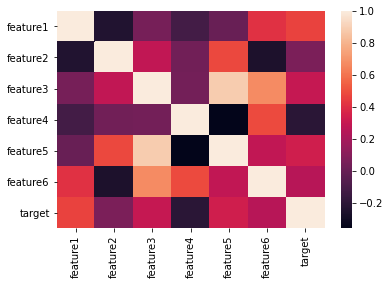

In [26]:
# Heatmap con correlaciones entre variables.
# Se observan ciertas correlaciones negativas y positivas entre algunas variables independientes.
sns.heatmap(df.corr()) 

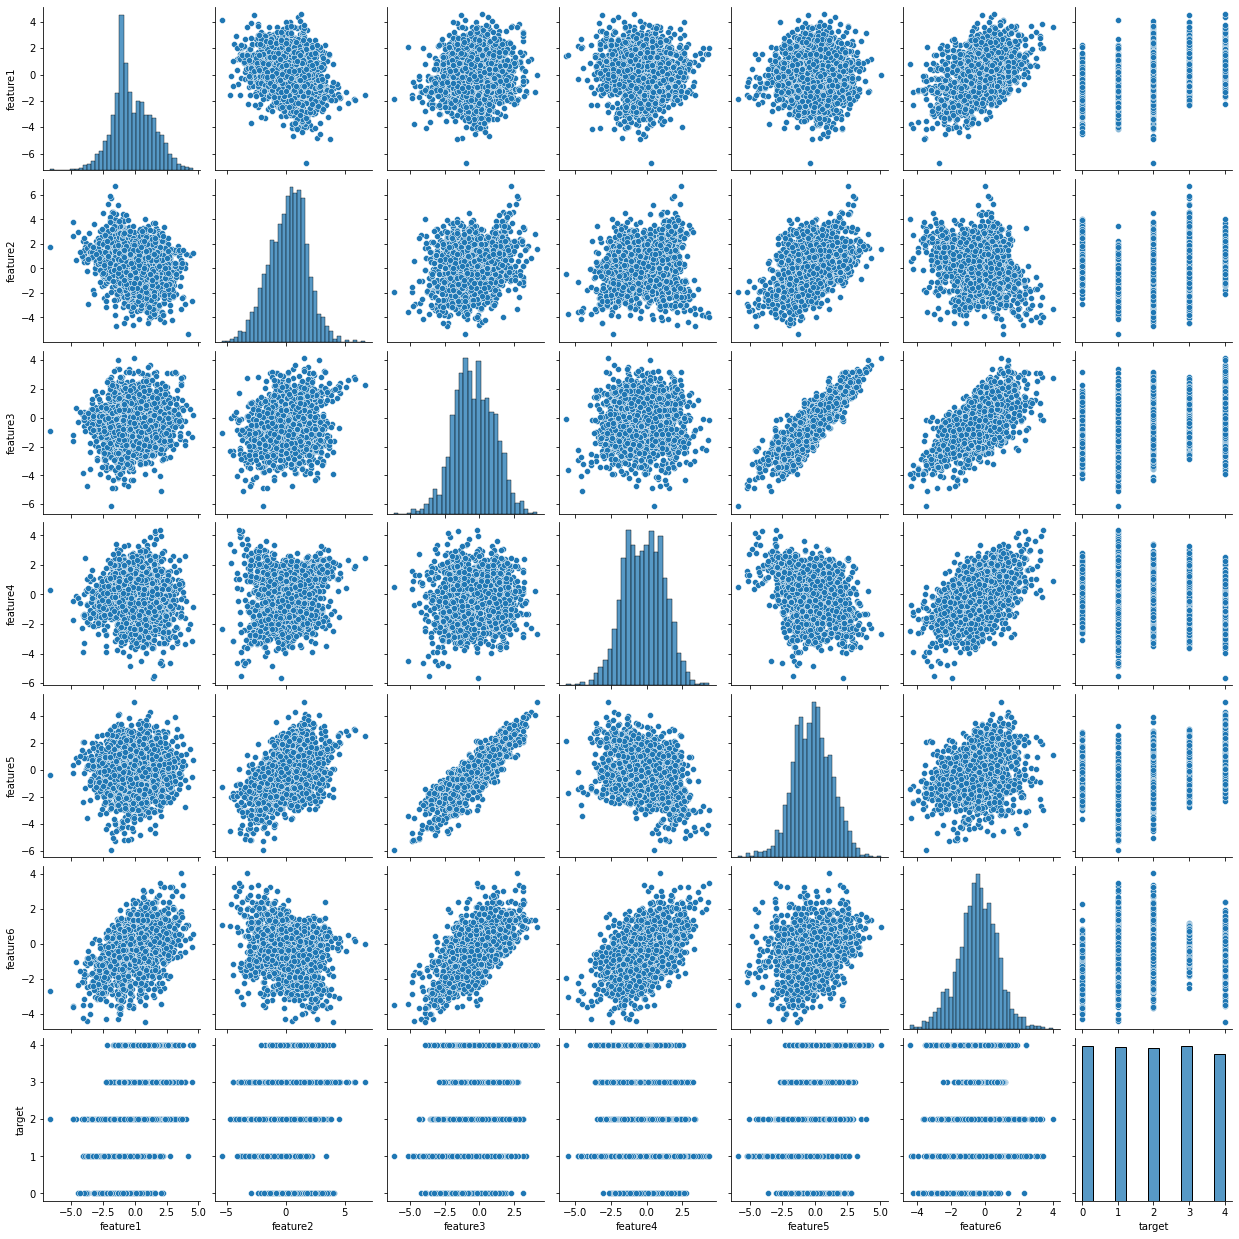

In [73]:
sns.pairplot(df)
# En las graficas de scatterplot observamos variables con cierta correlacion negativa y positiva. 
# En los histogramas observamos que las variables predictoras siguen una distribución normal.
# No se observa desbalanceo de clases en la variable target.

<AxesSubplot:>

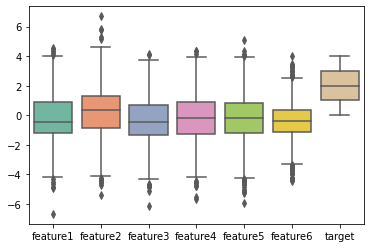

In [89]:
# Boxplot: nos indica que existen ciertas mediciones de los sensores que pueden ser categorizados como outliers.
sns.boxplot(data=df, orient="v", palette="Set2")

<AxesSubplot:>

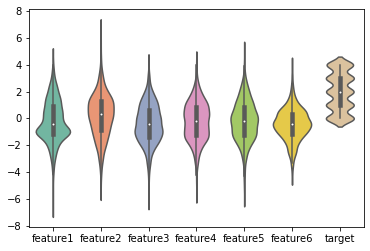

In [91]:
# Violinplot: observamos cierta uniformidad en la distribución de las mediciones de cada sensor, además de balanceo en las clases target.
sns.violinplot(data=df, orient="v", palette="Set2")

In [28]:
# Limpieza de caracteres no nulos, en caso de que los hubiera.
car = ['?','',' ','.','-']
df.replace(car,np.nan,inplace=True)

In [29]:
# Verificamos que no existan valores nulos en nuestro dataset, no existen valores nulos en nuestros features y target.
df.isnull().sum()/len(df)*100

feature1    0.0
feature2    0.0
feature3    0.0
feature4    0.0
feature5    0.0
feature6    0.0
target      0.0
dtype: float64

In [30]:
# Machine Learning

In [31]:
# Verificamos que no exista desbalanceo en las clases target, no se observa desbalanceo considerable.
df.target.value_counts()

0    427
3    426
1    423
2    419
4    405
Name: target, dtype: int64

In [52]:
# Definimos nuestras variables dependientes e independiente.
X_train = df.drop('target',axis=1).values
y_train = df.target.values

In [76]:
# Utilizamos Grid Search a fin de encontrar los mejores parametros para nuestro modelo Random Forest Classifier.

In [38]:
# Definimos los parametros a iterar en nuestro Grid Search.

params={'n_estimators': [500,600,700],  
        'criterion':['gini','entropy'],
        #'max_depth': [3,4,5,6,7,8,9,10],
        'max_features': [2,3,4],
        'min_samples_leaf':[5,10,20],
        'max_leaf_nodes': [100,200], 
        'min_impurity_decrease' : [0.0025,0.005,0.01,0.02], 
        'min_samples_split': [60,80,100] 
        }

In [39]:
# Incluimos distintas métricas a fin de seleccionar el modelo con los mejores scores.

scorers = {"f1_macro","accuracy","recall_macro"}  
clf = RandomForestClassifier()
grid_solver = GridSearchCV(estimator = clf, 
                   param_grid = params, 
                   scoring=scorers,
                   cv = 5,
                   refit="accuracy",
                   n_jobs=-1)

model_result = grid_solver.fit(X_train,y_train) 

print(model_result.cv_results_["mean_test_recall_macro"].mean())
print(model_result.cv_results_["mean_test_f1_macro"].mean())
print(model_result.cv_results_["mean_test_accuracy"].mean())
print(model_result.best_score_)
print(model_result.best_params_)

0.6796280096930674
0.6747792665992706
0.6787507348618459
0.7266666666666668
{'criterion': 'entropy', 'max_features': 4, 'max_leaf_nodes': 200, 'min_impurity_decrease': 0.0025, 'min_samples_leaf': 5, 'min_samples_split': 60, 'n_estimators': 700}


In [43]:
# Mejores parametros para el modelo, obtenidos a traves del Grid Search.
model_result.best_estimator_ 

RandomForestClassifier(criterion='entropy', max_features=4, max_leaf_nodes=200,
                       min_impurity_decrease=0.0025, min_samples_leaf=5,
                       min_samples_split=60, n_estimators=700)

In [44]:
# Definimos nuestras variables predictoras a fin de testear el modelo.
X_test = pd.read_csv('jm_X_test.csv')

In [93]:
X_test.head()

,feature1,feature2,feature3,feature4,feature5,feature6
0,0.943723,-2.985473,-0.938218,3.580261,-3.038106,2.080338
1,-0.899819,1.295568,1.274513,0.718186,1.117035,0.463068
2,0.293281,-0.099317,1.874902,-0.589582,1.828441,1.011596
3,-1.134804,0.888585,-1.464499,-1.183056,-0.525729,-1.963822
4,-0.909240,1.575797,0.697212,1.197092,0.486185,0.222644


In [53]:
# Entrenamos el modelo con los mejores parametros obtenidos previamente y realizamos predicciones (yhat) con nuestro X_test.
clf = model_result.best_estimator_ 
clf = clf.fit(X_train, y_train)
yhat = clf.predict(X_test)

In [60]:
# Predicciones con el tipo de erupción volcánica.
pd.DataFrame(yhat,columns = ['yhat']).to_csv('predicciones.csv',header = True,index = False)  

In [ ]:
## Una vez obtenidas las predicciones, testeamos reducción de dimensionalidad PCA,
# ya que algunas variables predictoras mostraban cierta correlacion.

In [67]:
# PCA para reduccion de dimensionalidad
pca = PCA()
X_train_pca = pca.fit_transform(X_train) 
pca.explained_variance_ratio_.shape  # Varianza explicada: array con el porcentaje de varianza explicada por cada dimensión.

(6,)

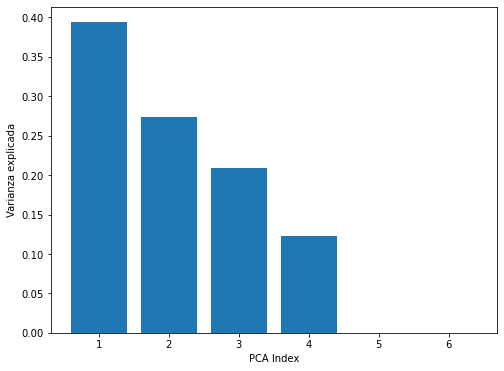

In [68]:
# Graficamos la varianza explicada por cada dimensión.
plt.figure(figsize=(8,6))
plt.bar(range(1, 7), pca.explained_variance_ratio_)
plt.ylabel('Varianza explicada')  
plt.xlabel('PCA Index')  
plt.show()

In [ ]:
# Elegimos cuatro variables predictoras, ya que suman el 100% de la varianza explicada.
pca = PCA(n_components=4)  
X_train_pca = pca.fit_transform(X_train)

In [69]:
# Utilizamos nuevamente un Grid Search a fin de analizar los mejores parámetros y sus métricas.
# Concluimos que las metricas obtenidas no son superiores a las obtenidas previamente sin aplicar PCA.
# Sin embargo, podría ser de interés práctico reducir la cantidad de sensores, a costa de una reducción en el score del modelo.

scorers = {"f1_macro","accuracy","recall_macro"}  
clf = RandomForestClassifier()
grid_solver = GridSearchCV(estimator = clf, 
                   param_grid = params, 
                   scoring=scorers,
                   cv = 5,
                   refit="accuracy",
                   n_jobs=-1)

model_result = grid_solver.fit(X_train_pca,y_train) 

print(model_result.cv_results_["mean_test_recall_macro"].mean())
print(model_result.cv_results_["mean_test_f1_macro"].mean())
print(model_result.cv_results_["mean_test_accuracy"].mean())
print(model_result.best_score_)
print(model_result.best_params_)

0.6466125578432057
0.6443410673260822
0.6464631099353322
0.7033333333333334
{'criterion': 'gini', 'max_features': 2, 'max_leaf_nodes': 100, 'min_impurity_decrease': 0.0025, 'min_samples_leaf': 5, 'min_samples_split': 60, 'n_estimators': 500}


In [ ]:
# FIN